# Imports


In [43]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import math

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [44]:
df = pd.read_csv('../processeddata/SP500_prices.csv')
df.set_index(['Date'],inplace=True)
df = df[['Close']]

df['Prediction'] = df['Close'].shift(-1)
df.dropna(inplace=True)

df

,Close,Prediction
Date,,
2013-02-08,1517.930054,1517.010010
2013-02-11,1517.010010,1519.430054
2013-02-12,1519.430054,1520.329956
2013-02-13,1520.329956,1521.380005
2013-02-14,1521.380005,1519.790039
...,...,...
2018-01-30,2822.429932,2823.810059
2018-01-31,2823.810059,2821.979980
2018-02-01,2821.979980,2762.129883


# Multivariate Linear Regression

linear model coeff (w): [0.99535877]
linear model intercept (b): 9.575
R-squared score (training): 0.995
R-squared score (test): 0.995
RMSE: 17.142


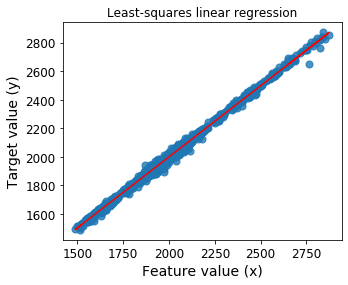

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = np.array(df.drop(['Prediction'], 1))
Y = np.array(df['Prediction'])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

linreg = LinearRegression().fit(X_train, y_train)

from sklearn import metrics

print('linear model coeff (w): {}'.format(linreg.coef_))

print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

plt.figure(figsize=(5,4))
plt.scatter(X, Y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [53]:
df

,Close,Prediction
Date,,
2013-02-08,1517.930054,1517.010010
2013-02-11,1517.010010,1519.430054
2013-02-12,1519.430054,1520.329956
2013-02-13,1520.329956,1521.380005
2013-02-14,1521.380005,1519.790039
...,...,...
2018-01-30,2822.429932,2823.810059
2018-01-31,2823.810059,2821.979980
2018-02-01,2821.979980,2762.129883
